In [89]:
import geopandas as gpd
import pandas as pd
import numpy as np
import osmnx as ox
import networkx as nx
import cenpy as cp

ox.__version__

'0.15.1'

In [3]:
acs = cp.remote.APIConnection("ACSDT5Y2018")

In [4]:
acs.set_mapservice("tigerWMS_ACS2018")

Connection to American Community Survey: 5-Year Estimates: Detailed Tables 5-Year(ID: https://api.census.gov/data/id/ACSDT5Y2018)
With MapServer: Census Current (2018) WMS

In [27]:
where_clause = "STATE = 24 AND COUNTY = 031"

montgomery = acs.mapservice.layers[10].query(where=where_clause)
montgomery = montgomery.to_crs(4326)

/Users/andrewrenninger/anaconda3/envs/musa-550-fall-2020/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [56]:
graphs = list()
misses = np.empty(0)

for i in montgomery.index:
    try: 
        G = ox.graph.graph_from_polygon(polygon=montgomery.geometry[i],
                                        network_type='drive')
        
    except: 
        np.append(misses, i)
        pass
    
    graphs.append(G)

In [93]:
net_stats = ox.stats.basic_stats(G)
net_stats

{'n': 44,
 'm': 94,
 'k_avg': 4.2727272727272725,
 'intersection_count': 29,
 'streets_per_node_avg': 2.5,
 'streets_per_node_counts': {0: 0, 1: 15, 2: 0, 3: 21, 4: 8},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.3409090909090909,
  2: 0.0,
  3: 0.4772727272727273,
  4: 0.18181818181818182},
 'edge_length_total': 6702.174999999999,
 'edge_length_avg': 71.29973404255318,
 'street_length_total': 3688.6819999999993,
 'street_length_avg': 73.77363999999999,
 'street_segments_count': 50,
 'node_density_km': None,
 'intersection_density_km': None,
 'edge_density_km': None,
 'street_density_km': None,
 'circuity_avg': 1.0849097866371173,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': None,
 'clean_intersection_density_km': None}

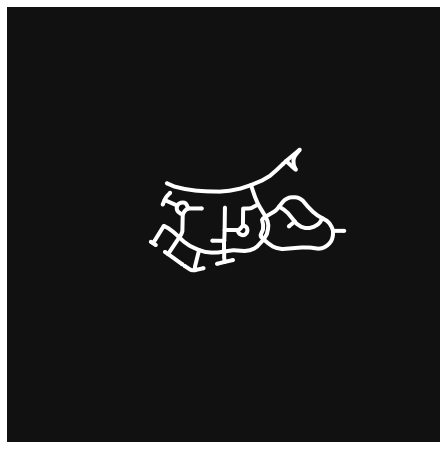

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [92]:
ox.plot.plot_figure_ground(G)

In [18]:
state = 24
year = 2015

url = f"https://www2.census.gov/geo/tiger/GENZ{year}/shp/cb_{year}_{state}_bg_500k.zip"

<AxesSubplot:>

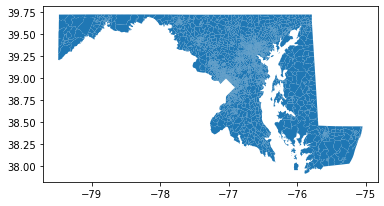

In [71]:
maryland = gpd.read_file(url)
maryland.geometry.plot()